<h1>Comprendre l'analyse en composantes principales</h1>

Lorsqu’on étudie simultanément un nombre important de variables quantitatives, les individus étudiés ne sont plus représentés dans un plan, espace de dimension 2, mais dans un espace de dimension plus importante. 
L’objectif de l’Analyse en Composantes Principales (ACP) est
de revenir à un espace de dimension réduite (par exemple 2) en déformant le moins possible la réalité. 
Il s’agit donc d’obtenir le résumé le plus pertinent possible des données initiales.
C’est la matrice des variances-covariances (ou celle des corrélations) qui va permettre de réaliser ce résumé pertinent. On va diagonaliser cette matrice afin d'obtenir les informations essentielles en plus petit nombre.

# Dépendances

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, cos, sin, pi

# Jeu de données

In [ ]:
# Le jeu de données provient du site https://husson.github.io/data.html 
filename = "/content/AnaDo_JeuDonnees_TemperatFrance.csv"
df = pd.read_csv(filename, sep=";", encoding='latin-1')
df.head()

,Unnamed: 0,Janv,Févr,Mars,Avri,Mai,Juin,juil,Août,Sept,Octo,Nove,Déce,Lati,Long,Moye,Ampl,Région
0,Bordeaux,5.6,6.6,10.3,12.8,15.8,19.3,20.9,21.0,18.6,13.8,9.1,6.2,44.50,-0.34,13.33,15.4,SO
1,Brest,6.1,5.8,7.8,9.2,11.6,14.4,15.6,16.0,14.7,12.0,9.0,7.0,48.24,-4.29,10.77,10.2,NO
2,Clermont,2.6,3.7,7.5,10.3,13.8,17.3,19.4,19.1,16.2,11.2,6.6,3.6,45.47,3.05,10.94,16.8,SE
3,Grenoble,1.5,3.2,7.7,10.6,14.5,17.8,20.1,19.5,16.7,11.4,6.5,2.3,45.10,5.43,10.98,18.6,SE
4,Lille,2.4,2.9,6.0,8.9,12.4,15.3,17.1,17.1,14.7,10.4,6.1,3.5,50.38,3.04,9.73,14.7,NE


In [ ]:
# Mise en index des villes
df = df.set_index('Unnamed: 0')
villes = df.index.to_list()
villes

['Bordeaux',
 'Brest',
 'Clermont',
 'Grenoble',
 'Lille',
 'Lyon',
 'Marseille',
 'Montpellier',
 'Nantes',
 'Nice',
 'Paris',
 'Rennes',
 'Strasbourg',
 'Toulouse',
 'Vichy']

In [ ]:
# On ne conserve du dataframe d'origine que les 14 premières variables 
# (Colonnes Janvier à décembre + latitude, longitude)
data = df.iloc[:,0:-3]

# Mise des variables sous forme d'une liste.
variables = data.columns.to_list()

# Nombre de variables
K = len(variables)
for c in variables:
  print(c, end='\t')

# Réduction des données (retrancher la moyenne de chaque colonne et diviser par l'écart-type)
for c in variables:
  moy = data[c].mean(axis=0)
  sigma = data[c].std()
  #print("columns", c, "moyenne : ", round(moy,2), "ecart-type : ", round(sigma,2))
  data[c]=(data[c]-moy)/sigma

# Vérification
"""
for c in variables:
  moy = data[c].mean(axis=0)
  sigma = data[c].std()
  print("columns :", c, " : moyenne : ", round(moy,2), "ecart-type : ", round(sigma,2))
"""

# Données sous forme d'un tableau numpy
X = np.array(data)
X


Janv	Févr	Mars	Avri	Mai	Juin	juil	Août	Sept	Octo	Nove	Déce	Lati	Long	

array([[ 0.81037699,  0.94554598,  1.35157247,  1.28638315,  0.90832791,
         0.81776476,  0.50103207,  0.7123966 ,  0.87296222,  0.80874834,
         0.65049568,  0.6910229 , -0.67077649, -0.88101684],
       [ 1.05946828,  0.51737422, -0.28339423, -1.258111  , -1.88311885,
        -1.91431296, -1.98847101, -1.77270783, -1.23729769, -0.17486451,
         0.5950557 ,  1.09950934,  0.95895764, -2.07144438],
       [-0.68417074, -0.60657667, -0.47959023, -0.48062667, -0.42093245,
        -0.297369  , -0.20354428, -0.23194308, -0.42565926, -0.61202577,
        -0.73550363, -0.63655804, -0.24809144,  0.14064123],
       [-1.23217157, -0.87418402, -0.34879289, -0.26858549,  0.04430868,
        -0.01858556,  0.12525802, -0.03313473, -0.15511312, -0.50273546,
        -0.79094361, -1.3003485 , -0.40932182,  0.85791149],
       [-0.78380725, -1.03474843, -1.46057025, -1.47015217, -1.3514147 ,
        -1.41250277, -1.28389467, -1.22598485, -1.23729769, -1.04918704,
        -1.0127035 , -0.68

# Matrice de covariances et diagonalisation
On définit la matrice de covariances. Sa diagonalisation permettra de trouver les sous-espaces propres permettant de déterminer les axes principaux. 

In [ ]:
S = (1./K)*np.transpose(X).dot(X) # Matrice des covariances
S[:3,:3]

array([[1.        , 0.97347038, 0.83530137],
       [0.97347038, 1.        , 0.93114528],
       [0.83530137, 0.93114528, 1.        ]])

In [ ]:
#Recherche des valeurs propres et vecteurs propres
valp, vecp = np.linalg.eig(S) # Valeurs propres, vecteurs propres

valp

array([1.03494485e+01, 3.04870797e+00, 3.60583220e-01, 1.71408055e-01,
       3.67415449e-02, 1.34891492e-02, 9.72398221e-03, 5.14413425e-03,
       2.42255743e-03, 1.55019370e-03, 4.85267096e-04, 2.65689459e-04,
       5.43104528e-06, 2.42955923e-05])

In [ ]:
# Petit programme simple permettant de rechercher des deux plus grandes valeurs propres.
# mais np.linalg.eig() donne déjà les valeurs propres classées de la plus grande à la plus petite. 
indice1=0
indice2=0
vp1=0
vp2=0

for k, v in enumerate(valp):
  if v>vp1:
    vp1=v
    indice1=k
  elif v>vp2:
    vp2=v
    indice2=k

print(indice1, vp1, "\n", indice2, vp2)



0 10.349448509892568 
 1 3.04870797069532


In [ ]:
# Définition de la norme du vecteur tab
def norme(tab):
  s=0
  for _, v in enumerate(tab):
    s=s+v**2
  return sqrt(s)

# Définition du produit scalaire de deux vecteurs x et y
def prod_scal(x,y):
  s=0
  for k, v in enumerate(x):
    s=s+v*y[k]
  return s

# On définit la projection sur ces deux espaces vectoriels. 
# pour mémoire la projection du vecteur x sur l'espace vectoriel engendré par {e1, e2} est donnée par : 
# p(x)=<x,e1>/||e1||e1 + <x,e2>/||e2||e2 
# {e1, e2} sont les vecteurs propres associés aux deux plus grandes valeurs propres. 
def proj(x, e1=vecp[0], e2=vecp[1]):
  return prod_scal(x, e1), prod_scal(x, e2)

# Projection de chacune des villes (vecteurs-lignes) sur l'espace vectoriel engendré par {e1, e2}
vec_X = []
vec_Y = []

for i in range(len(villes)):
  x=proj(X[i][:])
  vec_X.append(x[0])
  vec_Y.append(x[1])

print(vec_X, "\n", vec_Y)


[0.7458510744969721, -0.8542523914094449, -0.6416201040276597, -0.31196174129870763, -1.344393664688743, -0.31702359786527456, 1.8193021485503804, 1.5945299282631684, -0.3022646847948835, 2.388894443921562, -0.6318799803975323, -0.6285159413595003, -1.4218671785745494, 0.5912110288692289, -0.6860093396850289] 
 [-0.5741226079654428, -1.6956809135118323, 0.5130449387308885, 0.9369685396081455, 0.21895140893316162, 0.837064415602615, -0.1488677900483321, -0.3280585701226284, -0.6115245406403105, -0.6284806114444392, 0.21404351535904206, -0.5841547511525762, 1.6041657576516986, -0.2913704948304777, 0.5380217038304912]


# Graphique de projection des individus sur l'espace vectoriel engendré par les deux axes principaux. 

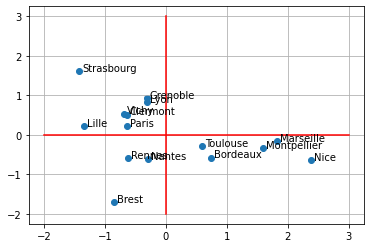

In [ ]:
plt.scatter(vec_X, vec_Y)
for i, txt in enumerate(villes):
    plt.annotate(txt, (vec_X[i]+0.05, vec_Y[i]))
plt.grid()
plt.plot([-2, 3], [0, 0], "red")
plt.plot([0, 0], [-2, 3], "red")
plt.show()


# Cercle des corrélations

In [ ]:
# Projection des variables initiales sur le plan principal : produit scalaire de x[:][j] et vec_X puis avec vec_Y
var_X = []
var_Y = []
for j in range(X.shape[1]):
  x = prod_scal(X[:][j], vec_X)/(norme(X[:][j])*norme(vec_X))
  y = prod_scal(X[:][j], vec_Y)/(norme(X[:][j])*norme(vec_Y))
  var_X.append(x)
  var_Y.append(y)


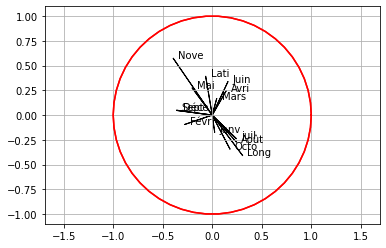

In [ ]:
# Création du cercle des corrélations
cercle_X=[]
cercle_Y=[]
cercle_inf=[]
N=50

for j in range(N+1):
  cercle_X.append(cos(2*pi/N*j))
  cercle_Y.append(sin(2*pi/N*j))
  cercle_inf.append(-sin(2*pi/N*j))

# Affichage des variables sous forme de flèches. 
for i, txt in enumerate(variables):
    plt.arrow(0, 0, var_X[i], var_Y[i])
    plt.annotate(txt, (var_X[i]+0.05, var_Y[i]))
  
plt.grid()
plt.axis("equal")
plt.plot(cercle_X, cercle_Y, "red")
plt.plot(cercle_X, cercle_inf, "red")
plt.show()

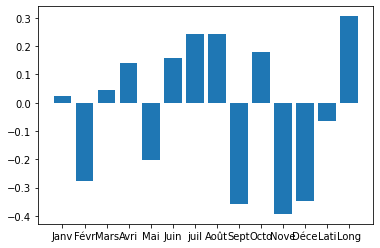

In [ ]:
# Poids des variables dans la constitution du premier axe pricipal.
plt.bar(variables, var_X)
plt.show()

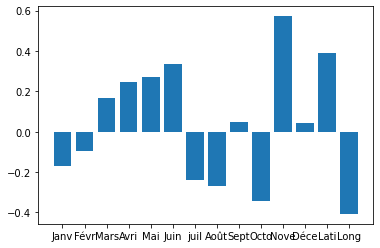

In [ ]:
# Poids des variables dans la constitution du deuxième axe pricipal.
plt.bar(variables, var_Y)
plt.show()

# Choix du nombre de composantes principales

### Part d'inertie expliquée
Elle est représentée par la somme des valeurs propres retenues divisées par la somme des toutes les valeurs propres. 

In [ ]:
for i in range(valp.shape[0]):
  r=sum(valp[:i+1])/sum(valp)
  print("Part d'inertie expliquée par ", i+1, "valeurs propres : ", r)

Part d'inertie expliquée par  1 valeurs propres :  0.7392463221351835
Part d'inertie expliquée par  2 valeurs propres :  0.9570111771848493
Part d'inertie expliquée par  3 valeurs propres :  0.9827671214535812
Part d'inertie expliquée par  4 valeurs propres :  0.9950105539368269
Part d'inertie expliquée par  5 valeurs propres :  0.9976349500013038
Part d'inertie expliquée par  6 valeurs propres :  0.9985984606577699
Part d'inertie expliquée par  7 valeurs propres :  0.9992930308155358
Part d'inertie expliquée par  8 valeurs propres :  0.9996604689764007
Part d'inertie expliquée par  9 valeurs propres :  0.9998335087931671
Part d'inertie expliquée par  10 valeurs propres :  0.9999442369148234
Part d'inertie expliquée par  11 valeurs propres :  0.9999788988502728
Part d'inertie expliquée par  12 valeurs propres :  0.9999978766687472
Part d'inertie expliquée par  13 valeurs propres :  0.9999982646005527
Part d'inertie expliquée par  14 valeurs propres :  1.0


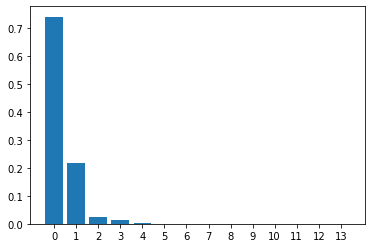

In [ ]:
# Pourcentage d'information expliquée par chaque axe.
information = [v/sum(valp) for v in valp]
txt = [str(i) for i in range(len(valp))]
plt.bar(txt, information)
plt.show()

### Règle de Kaiser
On ne conserve que les valeurs propres supérieures à leur moyenne.

In [ ]:
moyenne_vp = np.mean(valp)
for i in range(valp.shape[0]):
  if valp[i]>=moyenne_vp:
    print(valp[i])


10.349448509892568
3.04870797069532


### Les éboulis
On calcule la différence entre chaque valeur propre et sa suivante. Le principe consiste à rechercher, s’il existe, un “coude” (changement de signe dans la suite des différences d’ordre 2) dans le graphe et de ne conserver que les valeurs propres jusqu’à ce coude (Dans notre exemple, il n'y a pas de coude).

In [ ]:
for i in range(1, valp.shape[0]-1):
  r = valp[i-1]-valp[i]
  print(r)

7.300740539197248
2.6881247509330723
0.18917516499680873
0.1346665098627638
0.023252395712149376
0.0037651669818032085
0.004579847956613723
0.0027215768173800125
0.0008723637315403898
0.0010649266068978166
0.00021957763764889488
0.00026025841336360547
